## 예제
1. csv 폴더에서 4개의 파일을 로드 (tran1, tran2, tran_d_1, tran_d_2)
2. tran_1과 tran_2 는 단순한 행 추가 결합 (유니언 결합) 
3. tran_d_1 과 tran_d_2도 유니언 결합 
--------------------------------------------------------------------------------------------
4. 2번, 3번 과정에서 나온 데이터프레임을 특정 조건에 맞춰 2번 데이터프레임을 기준으로 열 추가 결합(조인결합)
5. csv 폴더에 있는 2개의 파일을 로드 (custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master 조인결합 
7. 6번 과정에서 나온 데이터프레임과 item_master 조인결합
8. 결합이 된 데이터 프레임에서 quantity 컬럼과 item_price 컬럼의 데이터를 가지고 total_price 라는 파생변수를 생성
(total_price = item_price * quantity)

In [15]:
import pandas as pd
import os

In [32]:
#
tran1 = pd.read_csv('../csv/tran_1.csv')
tran2 = pd.read_csv('../csv/tran_2.csv')
tran_d_1 = pd.read_csv('../csv/tran_d_1.csv')
tran_d_2 = pd.read_csv('../csv/tran_d_2.csv')
custom_master = pd.read_csv('../csv/customer_master.csv')
item_master = pd.read_csv('../csv/item_master.csv')

# #2
tran_union = pd.concat([tran1, tran2])
tran_d_union = pd.concat([tran_d_1, tran_d_2])
print(tran_union)

# #3
merge = pd.merge(tran_union, tran_d_union, on='transaction_id', how='left')
merge = pd.merge(merge, custom_master, on='customer_id', how='left')
merge = pd.merge(merge, item_master, on='item_id', how='left')
merge['total_price'] = merge['item_price'] * merge['quantity']






     transaction_id   price         payment_date customer_id
0       T0000000113  210000  2019-02-01 01:36:57    PL563502
1       T0000000114   50000  2019-02-01 01:37:23    HD678019
2       T0000000115  120000  2019-02-01 02:34:19    HD298120
3       T0000000116  210000  2019-02-01 02:47:23    IK452215
4       T0000000117  170000  2019-02-01 04:33:46    PL542865
...             ...     ...                  ...         ...
1781    T0000006894  180000  2019-07-31 21:20:44    HI400734
1782    T0000006895   85000  2019-07-31 21:52:48    AS339451
1783    T0000006896  100000  2019-07-31 23:35:25    OA027325
1784    T0000006897   85000  2019-07-31 23:39:35    TS624738
1785    T0000006898   85000  2019-07-31 23:41:38    AS834214

[6786 rows x 4 columns]


In [33]:
#풀이

import pandas as pd 


In [35]:
tran1 = pd.read_csv('../csv/tran_1.csv')
tran2 = pd.read_csv('../csv/tran_2.csv')
trand1 = pd.read_csv('../csv/tran_d_1.csv')
trand2 = pd.read_csv('../csv/tran_d_2.csv')

In [46]:
# tran1, tran2 유니언 결합
tran = pd.concat([tran1, tran2], axis = 0, ignore_index= True)

In [45]:
# trand1, trand2 유니언 결합

trand = pd.concat ( [trand1,trand2], axis = 0 , ignore_index = True)

In [42]:
#조인결합하기위해 자료구성을 확인하여 조건 발견
trand1.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [44]:
tran1.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [54]:
# tran, trand 를 조인 결합 (조건: transaction_id, how : tran )
tran = pd.merge(tran, trand, on = 'transaction_id', how = 'left')
customer_master = pd.read_csv('../csv/customer_master.csv')
item_master = pd.read_csv('../csv/item_master.csv')

In [55]:
customer_master.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [56]:
# tran, customer_master 조인결합 ( 조건 : customer_id, how: inner or left)
total_df = pd.merge(tran, customer_master, on = 'customer_id', how = 'inner')


In [67]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name_x,item_price_x,item_name_y,item_price_y
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,PC-E,210000


In [68]:
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [69]:
#total_df, item_master 조인결합 (조건 : item_id , how : inner)

total_df = pd.merge(total_df, item_master, on ='item_id' , how = 'inner')
total_df

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name_x,item_price_x,item_name_y,item_price_y,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,PC-E,210000,PC-E,210000
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,PC-E,210000,PC-E,210000
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,PC-E,210000,PC-E,210000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,PC-E,210000,PC-E,210000
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,PC-E,210000,PC-E,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,T0000006675,120000,2019-07-26 04:57:13,GD139734,6910,S003,1,XXXX,C03,M,2018-10-01 00:00:00,NaN,CA1,0,PC-C,120000,PC-C,120000,PC-C,120000
6065,T0000006751,120000,2019-07-28 10:14:39,PL988722,6989,S003,1,XXX,C03,M,2017-02-01 00:00:00,NaN,CA1,0,PC-C,120000,PC-C,120000,PC-C,120000
6066,T0000006757,120000,2019-07-28 11:23:32,HI015767,6995,S003,1,XXXXX,C03,M,2015-12-01 00:00:00,NaN,CA1,0,PC-C,120000,PC-C,120000,PC-C,120000
6067,T0000006835,240000,2019-07-30 11:08:09,HI555356,7078,S003,2,XXXXX,C02,M,2018-07-11 00:00:00,2019-03-31 00:00:00,CA1,1,PC-C,120000,PC-C,120000,PC-C,120000


In [74]:
# 새로운 파생변수 생성 total_price
# total_df['total_price'] = values 

total_df['total_price'] = total_df['item_price'] * total_df['quantity']

In [76]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,...,end_date,campaign_id,is_deleted,item_name_x,item_price_x,item_name_y,item_price_y,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,...,NaN,CA1,0,PC-E,210000,PC-E,210000,PC-E,210000,210000


In [80]:
# 거래 금액이 가장 좋은 아이템은 무엇인가 ? 

df = total_df[['item_name', 'total_price']].groupby('item_name').sum()
df

,total_price
item_name,
PC-A,128900000
PC-B,129030000
PC-C,105720000
PC-D,136260000
PC-E,326130000


In [91]:
#내림차순 정렬 
df.sort_values('total_price', ascending=False).head(1).index[0]#head 부분 없어도됨 


'PC-E'

In [94]:
total_df['gender']

0       M
1       F
2       F
3       M
4       M
       ..
6064    M
6065    M
6066    M
6067    M
6068    M
Name: gender, Length: 6069, dtype: object

In [97]:
origin_data = total_df.copy()

In [100]:
# loc를 이용하여 m,f 를 변경
# m -> 남자, f -> 여자 

total_df.loc[total_df['gender'] == 'M' , 'gender' ] == '남자'
total_df.loc[total_df['gender'] == 'F' , 'gender' ] == '여자'


1       False
2       False
6       False
8       False
9       False
        ...  
6055    False
6058    False
6061    False
6062    False
6063    False
Name: gender, Length: 2801, dtype: bool

In [102]:
total_df['gender'].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [104]:
total_df = origin_data.copy()

In [106]:
total_df['gender'].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [108]:
# apply() 사용하여 남자, 여자 변경 

def change(x) : 
    # x 에는 M 아니면 F 
    if x == 'F' : 
        result = '여자'
    else :
        result = '남자'
    return result



total_df['gender'].apply(change)

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [111]:
# 동일한 방법
total_df['gender'].apply(lambda x : '남자' if (x == 'M') else 
                         ("여자" if (x == 'F')else '무응답') )

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [113]:
#payment_date 컬럼을 시계열 데이터 변경 
# to_datetime() 함수 이용 


total_df.head(1) 

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,...,end_date,campaign_id,is_deleted,item_name_x,item_price_x,item_name_y,item_price_y,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,...,NaN,CA1,0,PC-E,210000,PC-E,210000,PC-E,210000,210000


In [120]:
dt = total_df['payment_date'] = pd.to_datetime(total_df['payment_date'], format ='%Y-%m-%d %H:%M:%S')


In [122]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 6068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  6069 non-null   object        
 1   price           6069 non-null   int64         
 2   payment_date    6069 non-null   datetime64[ns]
 3   customer_id     6069 non-null   object        
 4   detail_id       6069 non-null   int64         
 5   item_id         6069 non-null   object        
 6   quantity        6069 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   int64         
 14  item_name_x     6069 non-null   object        
 15  item

In [127]:
# 시계열 데이터에서 월-년 추출해서 새로운 파생변수 payment_month 생성 


total_df['payment_month'] = total_df['payment_date'].dt.strftime('%m-%Y')
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,...,campaign_id,is_deleted,item_name_x,item_price_x,item_name_y,item_price_y,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,...,CA1,0,PC-E,210000,PC-E,210000,PC-E,210000,210000,02-2019


In [133]:
# 월별 거래량을 확인 

group_data = total_df[['payment_month', 'total_price']].groupby('payment_month').sum()

In [131]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='payment_month'>

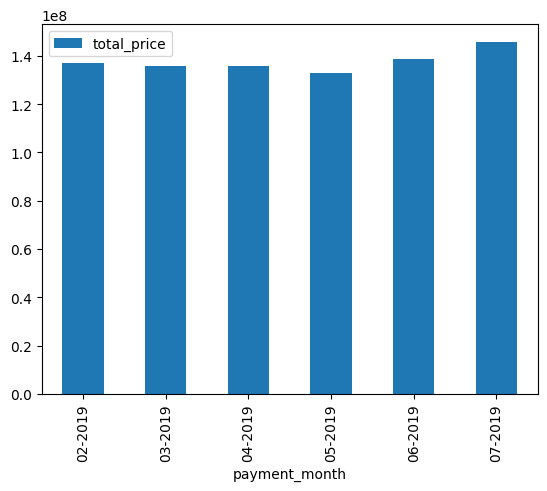

In [135]:
group_data.plot.bar()

In [137]:
pd.pivot_table(
    total_df,
    index = 'payment_month', 
    aggfunc = 'sum', 
    values = 'total_price'
)

,total_price
payment_month,
02-2019,136905000
03-2019,135695000
04-2019,135970000
05-2019,132750000
06-2019,138870000
07-2019,145850000


In [144]:
pivot_data = pd.pivot_table(
    total_df,
    index = 'payment_month', 
    aggfunc = ['sum', 'mean', 'min', 'max', 'std'],
    values = 'total_price'
)
pivot_data

,sum,mean,min,max,std
,total_price,total_price,total_price,total_price,total_price
payment_month,,,,,
02-2019,136905000,137592.964824,50000,420000,68848.024325
03-2019,135695000,135154.382470,50000,420000,69144.112878
04-2019,135970000,136106.106106,50000,420000,69473.778972
05-2019,132750000,133551.307847,50000,420000,68905.731855
06-2019,138870000,135747.800587,50000,420000,67480.539578
07-2019,145850000,138377.609108,50000,420000,68827.693467
